In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import csv

In [ ]:
# Set file paths
whaleret_data = Path("C:/Users/Squid Ink Tony/Jupyter-Workspace/whale_returns.csv")
algoret_data = Path("C:/Users/Squid Ink Tony/Jupyter-Workspace/algo_returns.csv")
sp500his_data = Path("C:/Users/Squid Ink Tony/Jupyter-Workspace/sp500_history.csv")

In [ ]:
# Read the individual CSV datasets
whaleret_df = pd.read_csv(whaleret_data)
algoret_df = pd.read_csv(algoret_data)
sp500his_df = pd.read_csv(sp500his_data)

In [114]:
#Whale Returns
whaleret_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [115]:
whaleret_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

<h1>PORTFOLIO RETURNS

In [116]:
whaleret_df = pd.read_csv(whaleret_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
# whale_returns.describe()
whaleret_df.sort_index(ascending = True, inplace = True)


whaleret_df.head()
whaleret_df.dropna() 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [117]:
#Algo Returns
algoret_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [118]:
algoret_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [119]:
# Fix Data Types
algoret_df = pd.read_csv(algoret_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
algoret_df.sort_index(ascending = True, inplace = True)

algoret_df.head()
algoret_df.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [120]:
#SP500 History
sp500his_df.head()
sp500his_df.dtypes

Close    float64
dtype: object

In [121]:
sp500his_df.isnull().sum()

Close    0
dtype: int64

In [122]:
# Fix Data Types
sp500his_df = pd.read_csv(sp500his_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500his_df.sort_index(ascending = True, inplace = True)

sp500his_df["Close"]= sp500his_df["Close"].str.replace('$','').astype("float")
sp500his_df.sort_index(inplace = True)

sp500his_df.head()
sp500his_df.dropna()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [123]:
# Calculate Daily Returns
sp500_daily_returns = sp500his_df.pct_change()

In [124]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()



,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


<H2> Portfolio Returns w/S&P 500 Closing

In [125]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whaleret_df, algoret_df, sp500_daily_returns], axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


<AxesSubplot:xlabel='Date'>

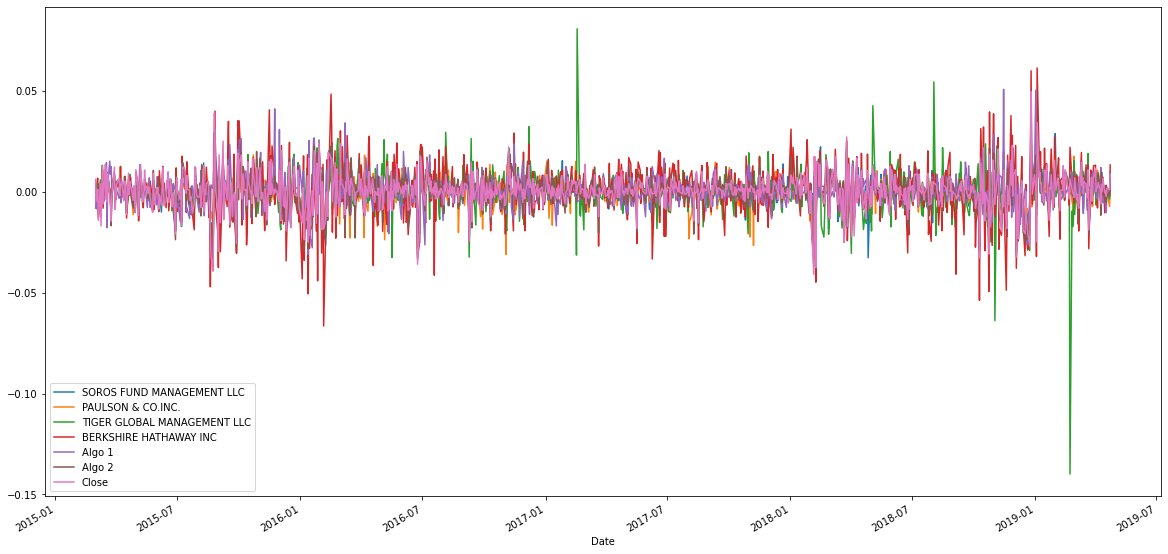

In [126]:
# Plot daily returns
combined_df.plot(figsize = (20,10))

<H4> Tiger Global is distributing the great volatility.

<AxesSubplot:xlabel='Date'>

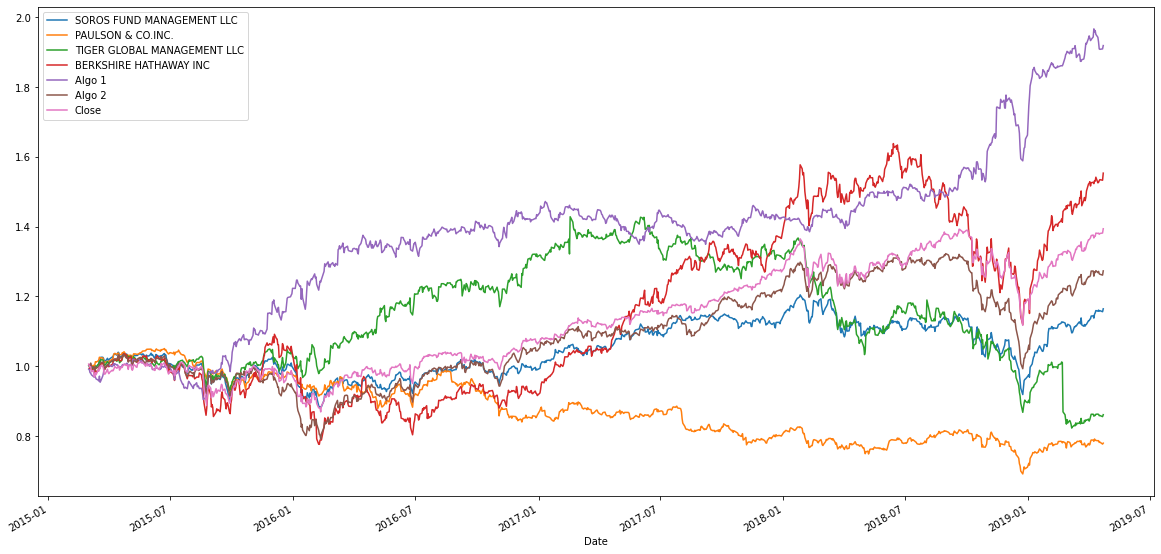

In [127]:
# Plot cumulative returns
df_cum = (1+ combined_df).cumprod()
df_cum.plot(figsize = (20,10))

<H4> Algo 1 is showing the highest return while Paulson is performing the lowest.

<AxesSubplot:>

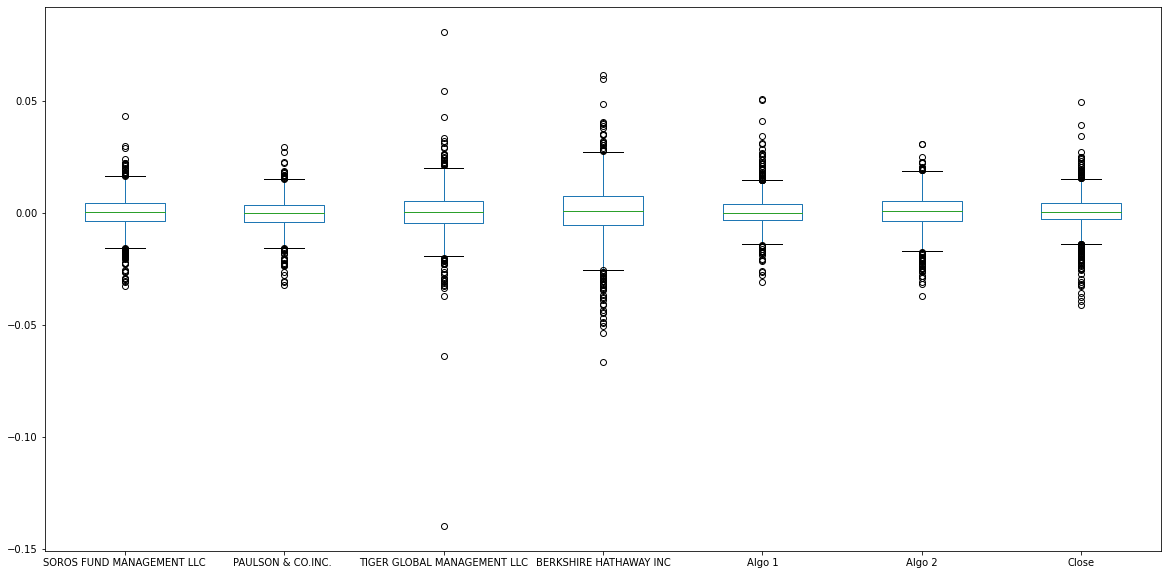

In [128]:
# Box plot to visually show risk
combined_df.plot(kind = "box", figsize = (20,10))

<H4> Algo 1 and SP500(Close) are exhibiting a positve skew or a higher frequency of steady growth.

In [129]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
combined_df_std = pd.DataFrame(combined_df.std()).rename(columns = {0:"std"})
combined_df_std



,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007621
Algo 2,0.008339
Close,0.008551


In [130]:
# Determine which portfolios are riskier than the S&P 500
higher_std = combined_df_std[combined_df_std["std"] > combined_df_std.loc["Close", "std"]]
higher_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


<H4> Tiger and Berkshire have higher volatility than SP500.

In [131]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = combined_df_std*np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120987
Algo 2,0.132374
Close,0.135751


<H4> Tiger and Berkshire's higher volatility is sustained over a 252 trading day period.

<AxesSubplot:xlabel='Date'>

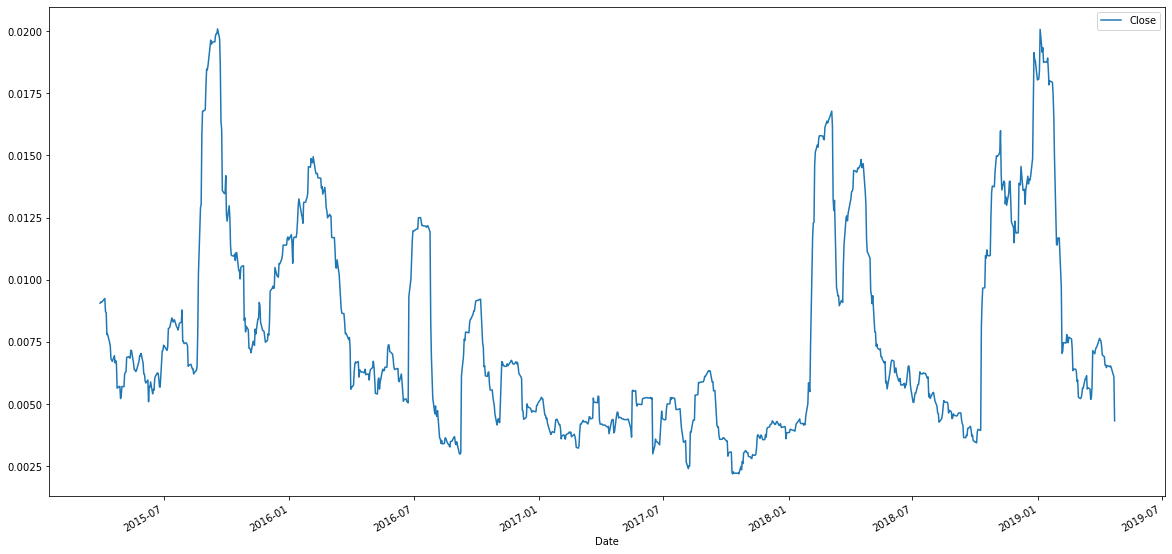

In [132]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_rolling_21 = combined_df[["Close"]].rolling(window = 21).std()
sp500_rolling_21.plot(figsize = (20,10))

In [133]:
# Correlation
correlation_sp500 = pd.DataFrame(combined_df.corr()).loc[:,"Close"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]

Algo 2    0.858753
Name: Close, dtype: float64

<H4> Algo 2 correlates the best with SP500(Close).

<AxesSubplot:xlabel='Close', ylabel='Algo 2'>

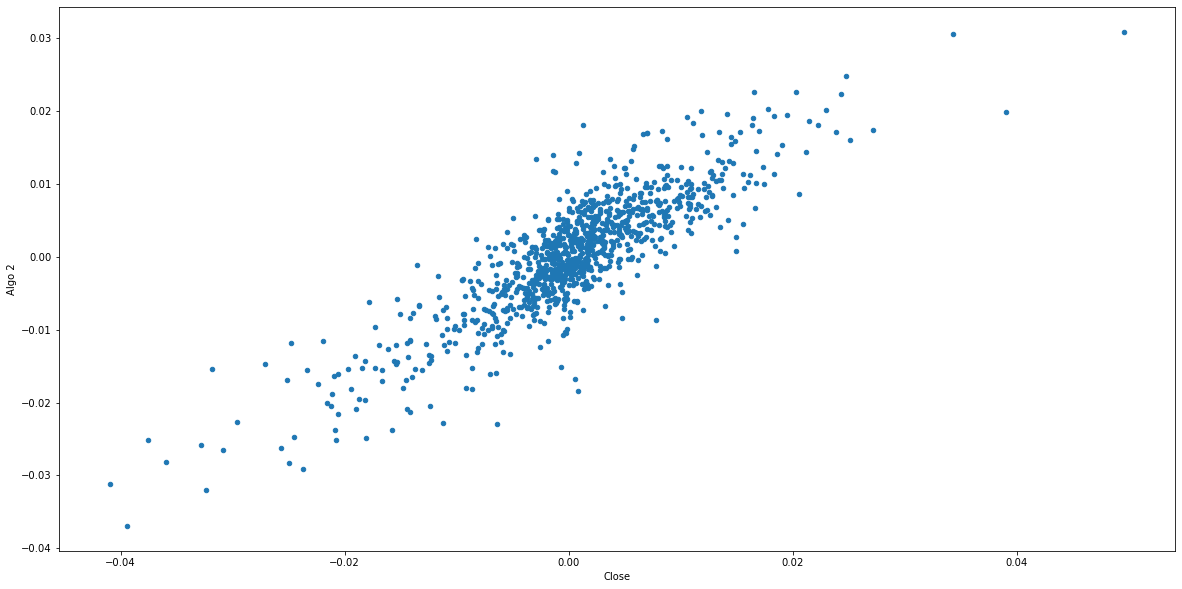

In [134]:
combined_df.plot(kind="scatter", y = "Algo 2", x = "Close", figsize = (20,10))


<AxesSubplot:title={'center':'Rolling 60-Day Beta of BH'}, xlabel='Date'>

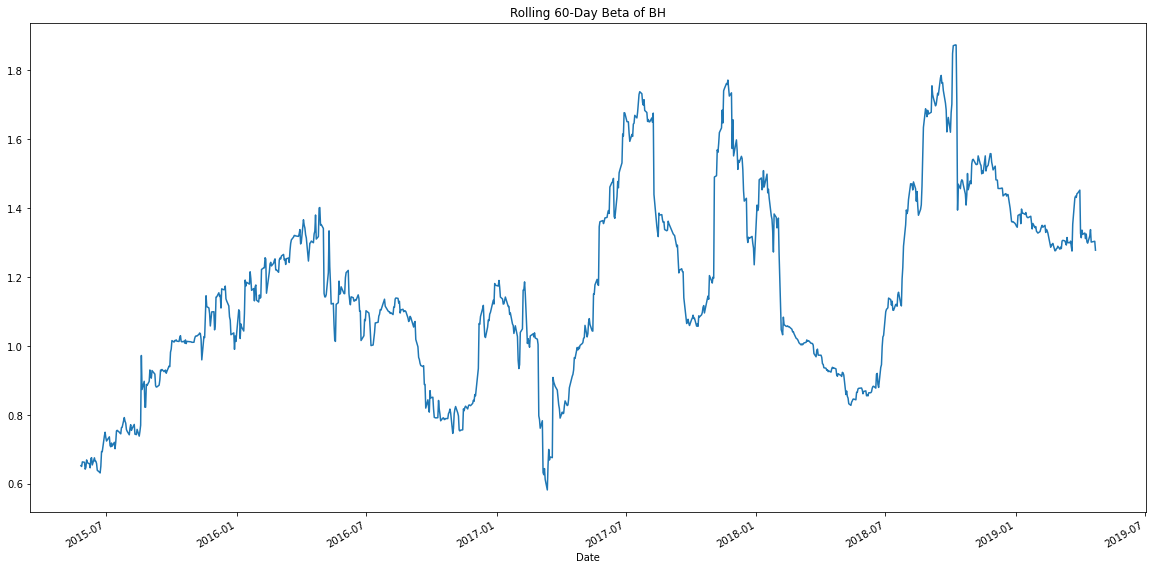

In [135]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['Close'])
rolling_variance = combined_df['Close'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')

<AxesSubplot:xlabel='Date'>

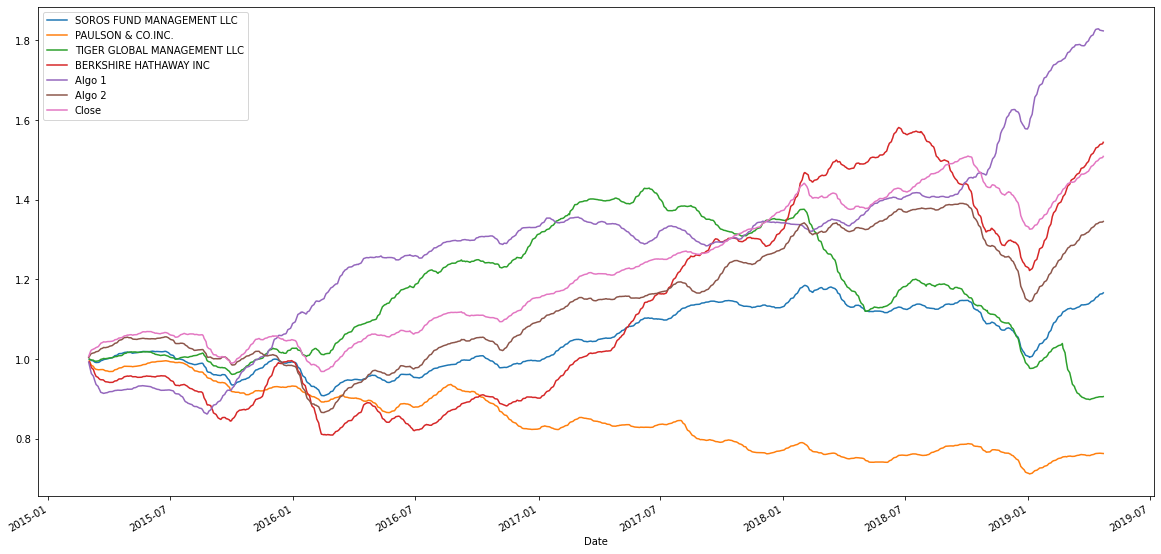

In [136]:
combined_df_ewm = combined_df.ewm(span = 21,adjust = False).mean()
(1+combined_df_ewm).cumprod().plot(figsize = (20,10))

<H4>Exponentially weighted moving average still shows Algo 1 as the leading performer.

In [137]:
# Annualzied Sharpe Ratios
sharpe_ratios = combined_df.mean()*252/(combined_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.360829
Algo 2                         0.506929
Close                          0.658706
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

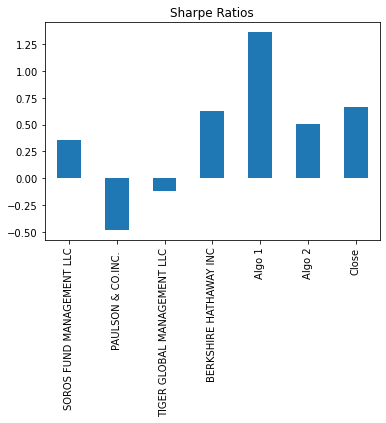

In [138]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

<H3> SP500(Close) is almost identical with Berkshire with SP500 having a slight higher performance of .036896

<H2> Introducing the AP Package

<H4> Introducing my portfolio of Axon Enterprise(AAXN), Identiv(INVE), and JD.com(JD) as a alternative investment strategy.

In [139]:
# Read the first stock
aaxn_history = pd.read_csv(Path("C:/Users/Squid Ink Tony/Jupyter-Workspace/AAXN.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
aaxn_history.head()

,AAXN
Date,
2018-01-02,26.55
2018-01-03,26.75
2018-01-04,26.83
2018-01-05,26.85
2018-01-08,26.77


In [140]:
# Read the second stock
inve_history = pd.read_csv(Path("C:/Users/Squid Ink Tony/Jupyter-Workspace/INVE.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
inve_history.head()

,INVE
Date,
2018-01-02,3.33
2018-01-03,3.36
2018-01-04,3.40
2018-01-05,3.42
2018-01-08,3.35


In [141]:
# Read the third stock
jd_history = pd.read_csv(Path("C:/Users/Squid Ink Tony/Jupyter-Workspace/JD.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
jd_history.head()

,JD
Date,
2018-01-02,43.28
2018-01-03,43.51
2018-01-04,43.67
2018-01-05,45.64
2018-01-08,46.10


In [142]:
# Concatenate all stocks into a single DataFrame
my_stocks = pd.concat((aaxn_history, inve_history, jd_history), axis = 1, join= "inner")
my_stocks.sort_index(ascending = True, inplace = True)
my_stocks.head()

,AAXN,INVE,JD
Date,,,
2018-01-02,26.55,3.33,43.28
2018-01-03,26.75,3.36,43.51
2018-01-04,26.83,3.40,43.67
2018-01-05,26.85,3.42,45.64
2018-01-08,26.77,3.35,46.10


In [143]:
# Reset the index
my_stocks.index = my_stocks.index.normalize()

In [144]:
# Drop Nulls
my_stocks.dropna(inplace=True)

In [145]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
APPackage = my_stocks.dot(weights)
APPackage_returns = APPackage.pct_change()
APPackage_returns.dropna(inplace = True)
APPackage_returns.head()

Date
2018-01-03    0.006288
2018-01-04    0.003803
2018-01-05    0.027199
2018-01-08    0.004084
2018-01-09    0.000394
dtype: float64

<h2> Portfolio Returns vs. AP Package

In [146]:
portfolio_returns = pd.concat((APPackage_returns,combined_df), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"APPackage"}, inplace = True)
portfolio_returns

,APPackage,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,,
2018-01-03,0.006288,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399
2018-01-04,0.003803,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029
2018-01-05,0.027199,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034
2018-01-08,0.004084,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-09,0.000394,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303
...,...,...,...,...,...,...,...,...
2019-04-16,0.013458,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.001452,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,-0.015792,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [147]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns

,APPackage,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,,
2018-01-03,0.006288,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399
2018-01-04,0.003803,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029
2018-01-05,0.027199,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034
2018-01-08,0.004084,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-09,0.000394,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303
...,...,...,...,...,...,...,...,...
2019-04-16,0.013458,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.001452,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,-0.015792,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [148]:
# Risk
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
APPackage,0.023661
SOROS FUND MANAGEMENT LLC,0.009486
PAULSON & CO.INC.,0.007383
TIGER GLOBAL MANAGEMENT LLC,0.014023
BERKSHIRE HATHAWAY INC,0.014726
Algo 1,0.007670
Algo 2,0.008836
Close,0.010175


In [149]:
higher_std = portfolio_std[portfolio_std["std"] > portfolio_std.loc["Close", "std"]]
higher_std

,std
APPackage,0.023661
TIGER GLOBAL MANAGEMENT LLC,0.014023
BERKSHIRE HATHAWAY INC,0.014726


<h4>AP Package is the riskiest of all portfolios.

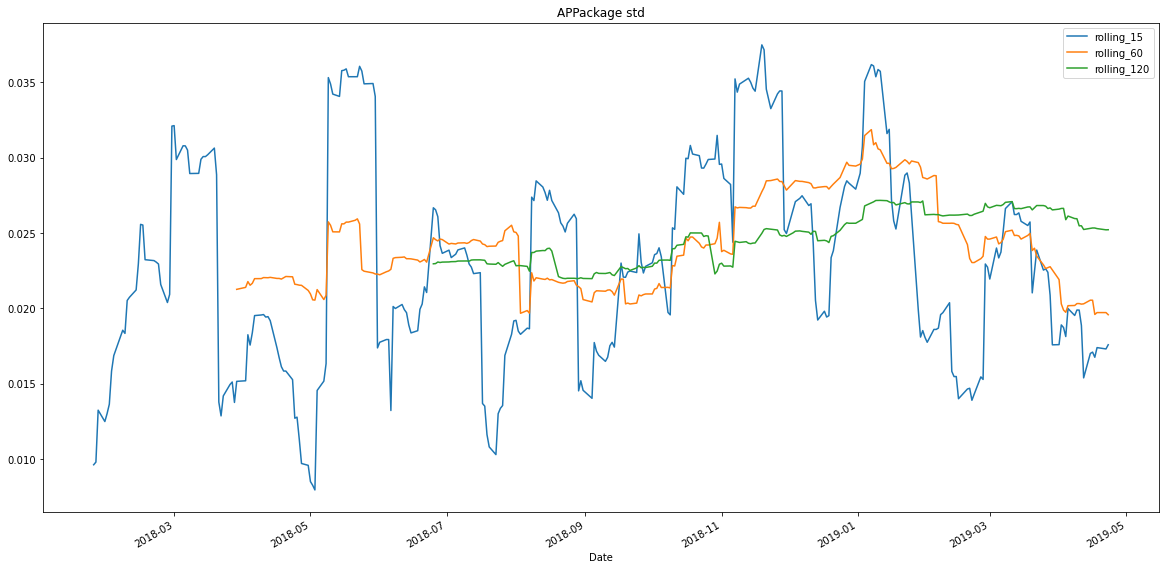

In [150]:
# Rolling
my_portfolio_rolling_15 = portfolio_returns[["APPackage"]].rolling(window = 15).std()
my_portfolio_rolling_60 = portfolio_returns[["APPackage"]].rolling(window = 60).std()
my_portfolio_rolling_120 = portfolio_returns[["APPackage"]].rolling(window = 120).std()
ax = my_portfolio_rolling_15.plot(figsize = (20,10), title = 'APPackage std')
my_portfolio_rolling_60.plot(ax = ax)
my_portfolio_rolling_120.plot(ax = ax)
ax.legend(['rolling_15','rolling_60','rolling_120'])

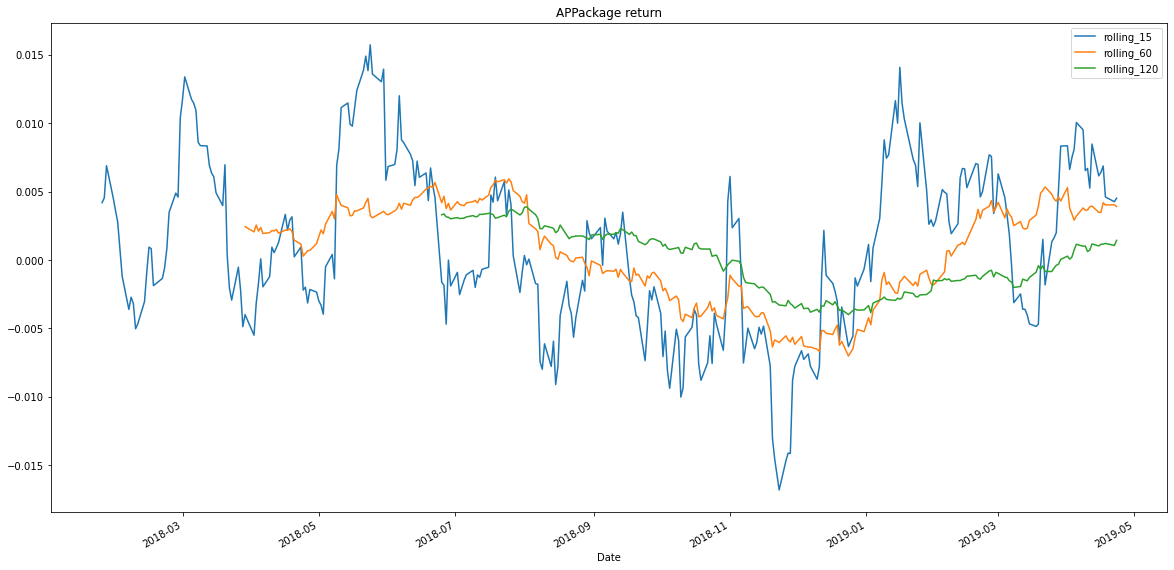

In [151]:
my_portfolio_rolling_15_return = portfolio_returns[["APPackage"]].rolling(window = 15).mean()
my_portfolio_rolling_60_return = portfolio_returns[["APPackage"]].rolling(window = 60).mean()
my_portfolio_rolling_120_return = portfolio_returns[["APPackage"]].rolling(window = 120).mean()
ax = my_portfolio_rolling_15_return.plot(figsize = (20,10), title = 'APPackage return')
my_portfolio_rolling_60_return.plot(ax = ax)
my_portfolio_rolling_120_return.plot(ax = ax)
ax.legend(['rolling_15','rolling_60','rolling_120'])

<AxesSubplot:title={'center':'Rolling 60-Day Beta of my portfolio'}, xlabel='Date'>

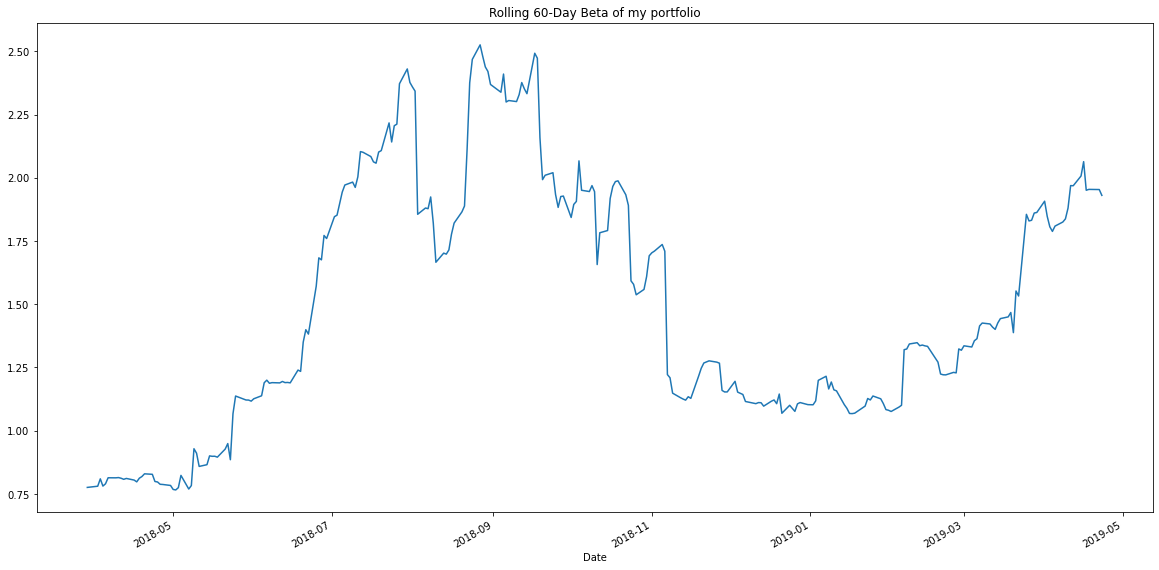

In [152]:
# Beta
rolling_covariance = portfolio_returns['APPackage'].rolling(window=60).cov(portfolio_returns['Close'])
rolling_variance = portfolio_returns['Close'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')

In [153]:
# Annualzied Sharpe Ratios
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))

<AxesSubplot:title={'center':'sharpe ratios'}>

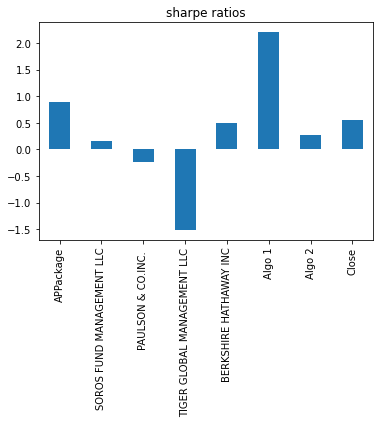

In [154]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

In [155]:
correlation_my_portfolio = portfolio_returns.corr().loc[:,"APPackage"]
correlation_my_portfolio[
    correlation_my_portfolio==correlation_my_portfolio[correlation_my_portfolio<1].max()]

BERKSHIRE HATHAWAY INC    0.614242
Name: APPackage, dtype: float64

<h4>Going into 2019, my AP Package was outperforming everyone but Algo 1.

<h2>Overall, Algo 1 is probably the most sound investment.

<h6> Submitted by Antonio Pinkston